<a href="https://colab.research.google.com/github/momoka07/thesis/blob/master/CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras.utils 
!pip install tensorboard

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=093ab20ec7566edd9faa04ce1f77befca14d467e46c714b77927ef4f142469f8
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [2]:
import os,re
import keras
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import models
from keras.models import Model
from keras import Input
from keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense, concatenate
from keras.callbacks import TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
# 学習データとテストデータを取得する。
fashion_mnist = keras.datasets.fashion_mnist

(_x_train_val, _y_train_val), (_x_test, _y_test) = fashion_mnist.load_data()


# データのフィルタリング
b = np.where(_y_train_val < 2)[0]  # 訓練データから「0」「1」の全インデックスの取得
_x_train_val, _y_train_val = _x_train_val[b], _y_train_val[b]  # そのインデックス行を抽出（＝フィルタリング）
c = np.where(_y_test < 2)[0]  # テストデータから「0」「1」の全インデックスの取得

_x_test, _y_test = _x_test[c], _y_test[c]      # そのインデックス行を抽出（＝フィルタリング）


# 学習中の検証データがないので、train_test_split()を使って学習データ8割、検証データを2割に分割する。test_sizeが検証データの割合になっている。
_x_train, _x_val, _y_train, _y_val = train_test_split(_x_train_val, _y_train_val, test_size=0.2)

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
# 学習、検証、テストデータの前処理用関数。
def preprocess(data, label=False):
    if label: # 教師データはto_categorical()でone-hot-encodingする。       
        data = to_categorical(data)
    else:
        data = data.astype('float32') / 255 # 0-255 -> 0-1
        # Kerasの入力データの形式は(ミニバッチサイズ、横幅、縦幅、チャネル数)である必要があるので、reshape()を使って形式を変換する。
        # (sample, width, height) -> (sample, width, height, channel)
        data = data.reshape((-1, 28, 28, 1))

    return data

In [5]:
x_train = preprocess(_x_train)
x_val= preprocess(_x_val)
x_test = preprocess(_x_test)

y_train = preprocess(_y_train, label=True)
y_val = preprocess(_y_val, label=True)
y_test = preprocess(_y_test, label=True)

In [6]:
def model_functional_api():

    input = Input(shape=(28, 28, 1))
    
    # フィルタごとにConv
    x1 = Conv2D(1, (5,5), padding='same', name='conv1_1', activation='relu')(input)
    x2 = Conv2D(1, (5,5), padding='same', name='conv1_2', activation='relu')(input)
    x3 = Conv2D(1, (5,5), padding='same', name='conv1_3', activation='relu')(input)

    # フィルタごとにPooling
    x1 = MaxPooling2D((3,3), name='pool1_1')(x1)
    x2 = MaxPooling2D((3,3), name='pool1_2')(x2)
    x3 = MaxPooling2D((3,3), name='pool1_3')(x3)

    x1 = Flatten(name='flatten1_1')(x1)
    x2 = Flatten(name='flatten1_2')(x2)
    x3 = Flatten(name='flatten1_3')(x3)   

    x1 = Dense(1, name='dense1_1', activation='relu')(x1) 
    x2 = Dense(1, name='dense1_2', activation='relu')(x2)
    x3 = Dense(1, name='dense1_3', activation='relu')(x3)

    # 結合
    x = concatenate([x1,x2,x3], name='concat')

    output = Dense(2, name='dense6', activation='softmax')(x)

    model = Model(input, output)

    return model

In [7]:
model = model_functional_api()
#model.summary()
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

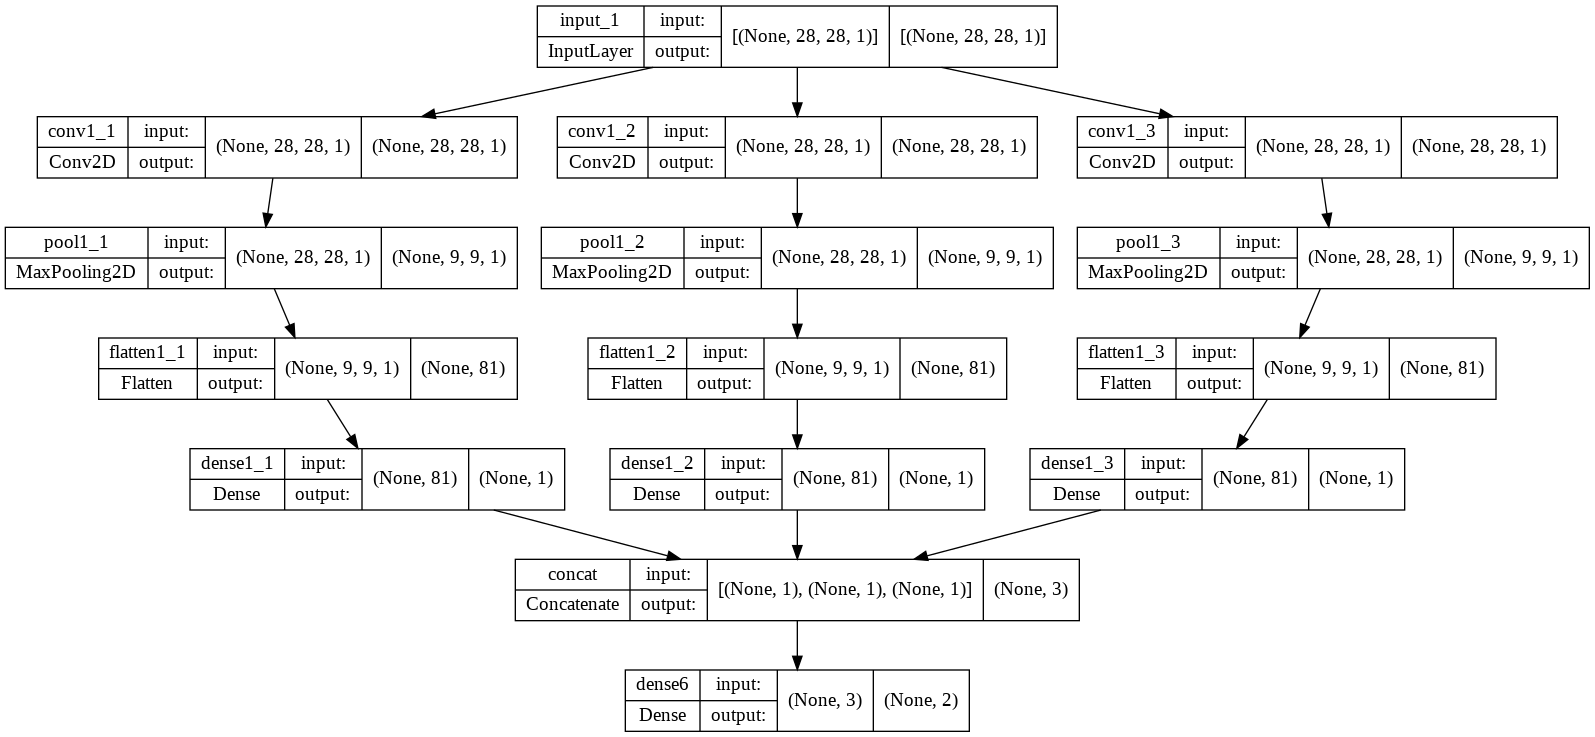

In [8]:
from tensorflow import keras
keras.utils.plot_model(model, 'my_model_with_shape_info.png', show_shapes=True)

In [9]:
history=model.fit(x_train, y_train, validation_split=0.25, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
57/57 [==============================] - 14s 226ms/step - loss: 0.6617 - acc: 0.5710 - val_loss: 0.6040 - val_acc: 0.8213
Epoch 2/10
57/57 [==============================] - 14s 248ms/step - loss: 0.5307 - acc: 0.8597 - val_loss: 0.4721 - val_acc: 0.9125
Epoch 3/10
57/57 [==============================] - 10s 168ms/step - loss: 0.4312 - acc: 0.9217 - val_loss: 0.4139 - val_acc: 0.9167
Epoch 4/10
57/57 [==============================] - 8s 141ms/step - loss: 0.3850 - acc: 0.9426 - val_loss: 0.3770 - val_acc: 0.9367
Epoch 5/10
57/57 [==============================] - 8s 141ms/step - loss: 0.3504 - acc: 0.9506 - val_loss: 0.3365 - val_acc: 0.9492
Epoch 6/10
57/57 [==============================] - 8s 142ms/step - loss: 0.3198 - acc: 0.9543 - val_loss: 0.3062 - val_acc: 0.9483
Epoch 7/10
57/57 [==============================] - 8s 141ms/step - loss: 0.2918 - acc: 0.9583 - val_loss: 0.2782 - val_acc: 0.9579
Epoch 8/10
57/57 [==============================] - 8s 142ms/step - loss:

In [10]:
# houzyoNN用 中間層の出力
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer('concat').output)
intermediate_output = intermediate_layer_model.predict(x_train)

In [11]:
# houzyoNNに入れるための中間出力
#print(intermediate_output)
# yの列を加えておく
intermediate_output=np.insert(intermediate_output, 0, _y_train, axis=1)

import pandas as pd 
pd.DataFrame(intermediate_output).to_csv('soturon2_3.csv', index=False, header=False)

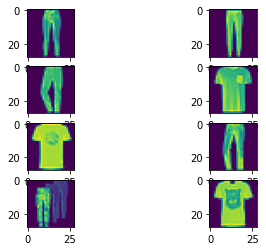

In [12]:
# データ可視化
import matplotlib.pyplot as plt

img = np.squeeze(x_train[:8])

for i in range(len(img)):
    plt.subplot(420 + 1 + i)
    plt.imshow(img[i][:,:])

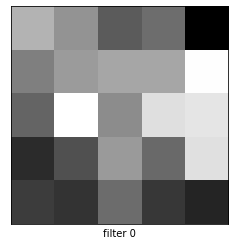

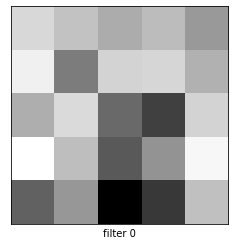

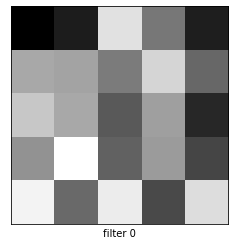

In [13]:
import matplotlib.pyplot as plt
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # TFメッセージ非表示


# フィルタ可視化
def filter_vi(model):
    vi_layer = []

    # 可視化対象レイヤー
    vi_layer.append(model.get_layer('conv1_1'))
    vi_layer.append(model.get_layer('conv1_2'))
    vi_layer.append(model.get_layer('conv1_3'))

    for i in range(len(vi_layer)):
        # レイヤーのフィルタ取得
        target_layer = vi_layer[i].get_weights()[0] #重み
        #print(target_layer)
        #print(target_layer.shape)
        filter_num = target_layer.shape[3]

        # ウィンドウ名定義
        fig = plt.gcf()
        fig.canvas.manager.set_window_title(vi_layer[i].name + " filter visualization")

        # 出力
        for j in range(filter_num):
            #plt.subplots_adjust(wspace=0.4, hspace=0.8)
            #plt.subplot(int(filter_num / 6 + 1), 6, j + 1)
            plt.xticks([])
            plt.yticks([])
            plt.xlabel(f'filter {j}')
            plt.imshow(target_layer[:, :, 0, j], cmap="gray")
        plt.show()

filter_vi(model)

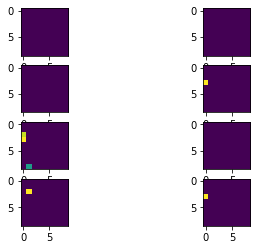

In [14]:
# 中身を見る用中間層の出力
conv1_model = Model(inputs=model.input,
                    outputs=model.get_layer('pool1_1').output)
conv1_output = conv1_model.predict(img)
conv1_output = np.squeeze(conv1_output)

for i in range(len(img)):
    plt.subplot(420 + 1 + i)
    plt.imshow(conv1_output[i][:,:])

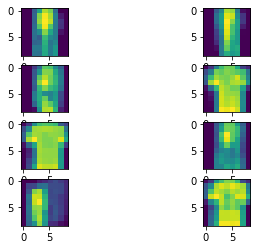

In [15]:
# 中身を見る用中間層の出力
conv1_model = Model(inputs=model.input,
                    outputs=model.get_layer('pool1_2').output)
conv1_output = conv1_model.predict(img)
conv1_output = np.squeeze(conv1_output)

for i in range(len(img)):
    plt.subplot(420 + 1 + i)
    plt.imshow(conv1_output[i][:,:])

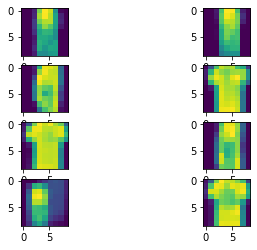

In [16]:
# 中身を見る用中間層の出力
conv1_model = Model(inputs=model.input,
                    outputs=model.get_layer('pool1_3').output)
conv1_output = conv1_model.predict(img)
conv1_output = np.squeeze(conv1_output)

for i in range(len(img)):
    plt.subplot(420 + 1 + i)
    plt.imshow(conv1_output[i][:,:])